Pengerjaan NGC baru 
MAULANA ACHSAN

# IMPORT LIBRARIES

In [272]:
import pandas as pd 
import numpy as np 
import sklearn
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



# IMPORTING DATA

In [273]:
df_ori = pd.read_csv('influencers.csv')
df= df_ori.copy()
df.head()

,fullname,first_name,last_name,username,gender,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,Albrecht Consadine,Albrecht,Consadine,aconsadinere,Male,1360,1358,597,978,278,98,5,0,1
1,Hayes Patriskson,Hayes,Patriskson,hpatrisksonkl,Male,2273,2,6,2273,0,0,0,0,0
2,Napoleon McVicar,Napoleon,McVicar,nmcvicar2v,Male,197,540,261,170,27,0,0,0,0
3,Simeon Kenan,Simeon,Kenan,skenan4f,Male,55,785,83,42,10,1,1,1,0
4,Laraine Frenzel;,Laraine,Frenzel;,lfrenzelmr,Female,216,679,191,160,52,2,2,0,0


Terlihat bagaimana bentukan dari kolom dan 5 baris sample dari data set. 

In [274]:
df.shape

(2334, 14)

Data terdiri dari 2334 baris dan 14 kolom 

In [275]:
df.columns

Index(['fullname', 'first_name', 'last_name', 'username', 'gender',
       'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

Disini terlihat bahwa tidak ada white space atau karakter aneh pada setiap kolom 

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   fullname       2334 non-null   object
 1   first_name     2334 non-null   object
 2   last_name      2334 non-null   object
 3   username       2334 non-null   object
 4   gender         2334 non-null   object
 5   num_reactions  2334 non-null   int64 
 6   num_comments   2334 non-null   int64 
 7   num_shares     2334 non-null   int64 
 8   num_likes      2334 non-null   int64 
 9   num_loves      2334 non-null   int64 
 10  num_wows       2334 non-null   int64 
 11  num_hahas      2334 non-null   int64 
 12  num_sads       2334 non-null   int64 
 13  num_angrys     2334 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 255.4+ KB


Terlihat pada kolom sudah ada type data yang benar seperti fullname berbentuk object dan pada num_reactions (jumlah dari reaksi) berbentuk integer karena kolom ini merupakan jumlah. 

In [277]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_reactions,2334.0,283.409597,446.605370,0.0,28.25,160.0,296.75,4094.0
num_comments,2334.0,642.478149,1442.202386,0.0,0.00,39.0,670.75,20990.0
num_shares,2334.0,115.679949,206.980639,0.0,0.00,12.0,169.00,3424.0
num_likes,2334.0,243.015424,413.178828,0.0,27.00,117.0,238.00,4094.0
num_loves,2334.0,35.540274,63.326895,0.0,0.00,3.0,49.00,657.0
num_wows,2334.0,2.448158,14.625152,0.0,0.00,0.0,1.00,278.0
num_hahas,2334.0,1.735219,6.046270,0.0,0.00,0.0,2.00,157.0
num_sads,2334.0,0.413882,1.477969,0.0,0.00,0.0,0.00,37.0
num_angrys,2334.0,0.254070,0.711890,0.0,0.00,0.0,0.00,8.0


In [278]:
df.duplicated().sum()

0

Tidak ada data duplikat lanjut ke selanjutnya 

In [279]:
df.isna().sum()

fullname         0
first_name       0
last_name        0
username         0
gender           0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

Tidak ada missing value pada data kita bisa simple EDA pada data ini.

# EDA 

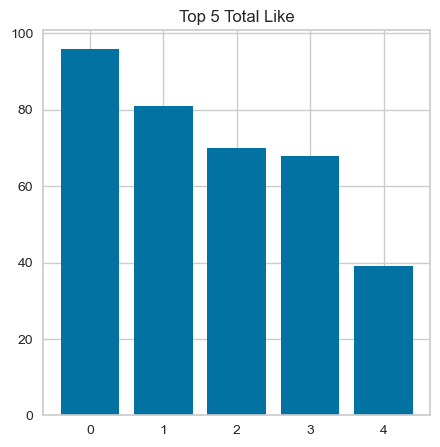

In [280]:
jml_like = df['num_likes'].value_counts().sort_values(ascending=False).head()
plt.figure(figsize=(5,5))
plt.bar (x= jml_like.index , height= jml_like.values) 
plt.title('Top 5 Total Like')
plt.show()

Data dari influencer ini menunjukkan bahwa top 5 total like dari influencer di bawah 100. urutan pertama saja tidak lebbih dari 100. Saya kurang tau apakah metriks ini sudah disederhanakan atau belum, jika belum maka saran saya ganti influencer karena total like nya tidak lebih dari 100, sebagai influencer harusnya total like itu di angka ratusan atau puluhan ribu. Karena benda viral di sosial media saja biasanya minimal mendapat like ribuan. OLeh karena itu ini perlu dipertimbangkan ulang untuk pengambbilan influencer ini jika ini merupakan data asli. 

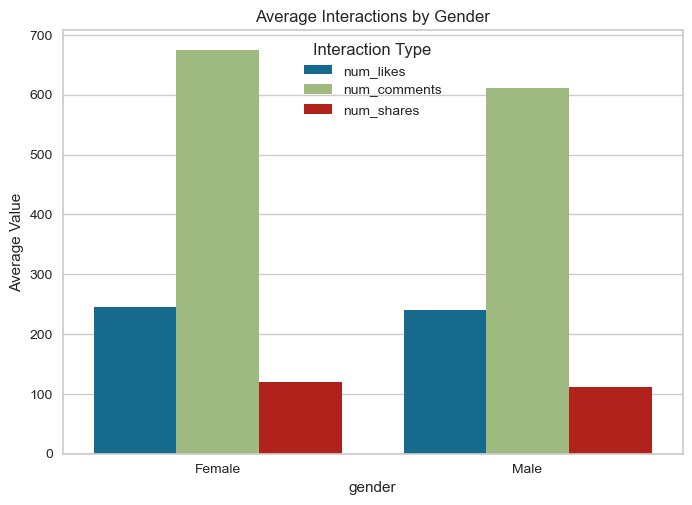

In [281]:
# grup by gender komen dan shares
grup=df.groupby('gender')[['num_likes','num_comments','num_shares']].mean().reset_index()

# Mengubah DataFrame dari wide format ke long format agar dapat dipakai oleh sns.barplot
grup_melted = grup.melt(id_vars='gender', value_vars=['num_likes', 'num_comments', 'num_shares'], 
                        var_name='Interaction Type', value_name='Average Value')

# Membuat barplot
sns.barplot(x='gender', y='Average Value', hue='Interaction Type', data=grup_melted)

# Menampilkan plot
plt.title('Average Interactions by Gender')
plt.show()

In [282]:
grup

,gender,num_likes,num_comments,num_shares
0,Female,245.293814,674.082474,119.648625
1,Male,240.748718,611.035897,111.731624


Perbedaan gender hanya mempengaruhi sedikit performa metriks diantara 2 gender dari influencer. Influencer wanita cenderung sedikit memimpin pada semua metriks yang ditamplikan.Kesimpulannya rata-rata dari likes comments dan share antara influencer wanita dan pria tidak terlalu berbeda jauh. Company tidak harus condong ke salahsatu gender dari influencer karena dari metriks ini ternyata keduanya berperforma baik dari segi rata-rata jumlah like comments dan shares. 

In [283]:
df[['num_hahas','num_wows','num_sads','num_angrys']].sum()


num_hahas     4050
num_wows      5714
num_sads       966
num_angrys     593
dtype: int64

Sepertinya ini tidak bisa kita jadikan acuan ya guys 

# Fitur Engineering

Harusnya kita bisa buang hahas wows sads dan angry karena itu nilai sangat sedikit sekali atau mungkiin kita bisa buat 2 model dari itu 

# Dimensionality Reduction

In [284]:
# Get only the transactions
influencer_df=df.drop(['fullname','first_name','last_name','username','gender'], axis=1)
influencer_df

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1360,1358,597,978,278,98,5,0,1
1,2273,2,6,2273,0,0,0,0,0
2,197,540,261,170,27,0,0,0,0
3,55,785,83,42,10,1,1,1,0
4,216,679,191,160,52,2,2,0,0
...,...,...,...,...,...,...,...,...,...
2329,758,24,3,758,0,0,0,0,0
2330,27,0,0,27,0,0,0,0,0
2331,0,0,0,0,0,0,0,0,0
2332,0,0,0,0,0,0,0,0,0


In [285]:
# Feature scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(influencer_df)

# Dimensionality Reduction using PCA
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_scaled)

PCA()

Text(0, 0.5, 'Eigenvalues')

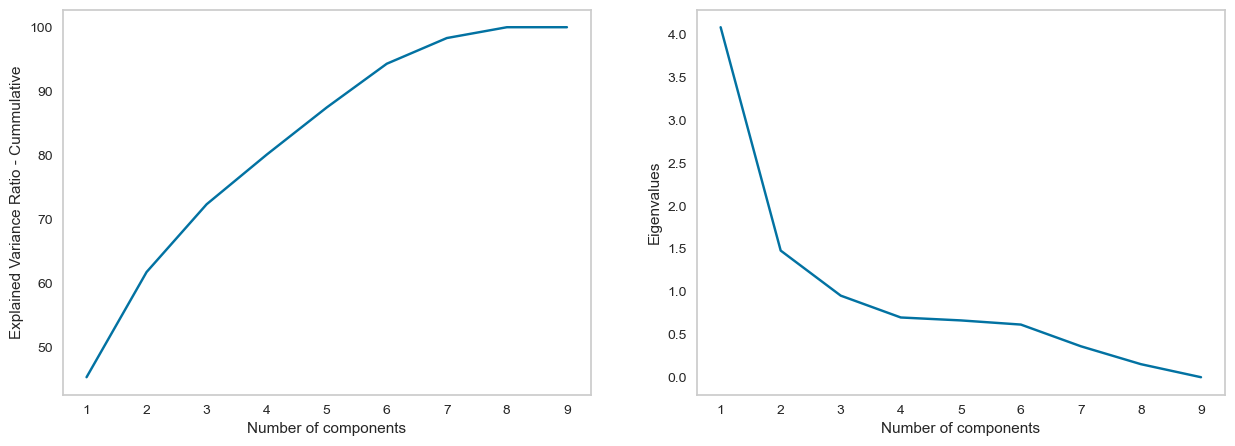

In [286]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 10), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 10), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

In [287]:
# Check the number of features if we want to retain 95 % of the information

cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.80) + 1
num_features

4

In [288]:
# Let's train the model with 80 % of the original dataset information

pca = PCA(n_components=4)
pca.fit(df_scaled)

sales_scaled_pca = pca.transform(df_scaled)

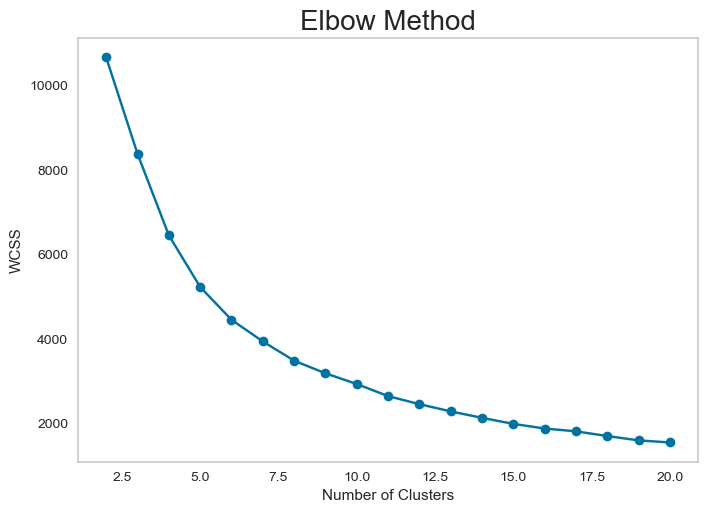

In [289]:
# Find the optimal number of clusters using Elbow Method
from sklearn.cluster import KMeans

wcss = []
random_state = 10
max_cluster = 20
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(sales_scaled_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Kayaknya 5 deh clusternya 

In [290]:
# Function to create Silhouette Plot

import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples

def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.7252929715558433
For n_clusters = 3 The average silhouette_score is : 0.7094584981488657
For n_clusters = 4 The average silhouette_score is : 0.647425888056233
For n_clusters = 5 The average silhouette_score is : 0.5250179315114624
For n_clusters = 6 The average silhouette_score is : 0.5203267575308381
For n_clusters = 7 The average silhouette_score is : 0.52088604466279


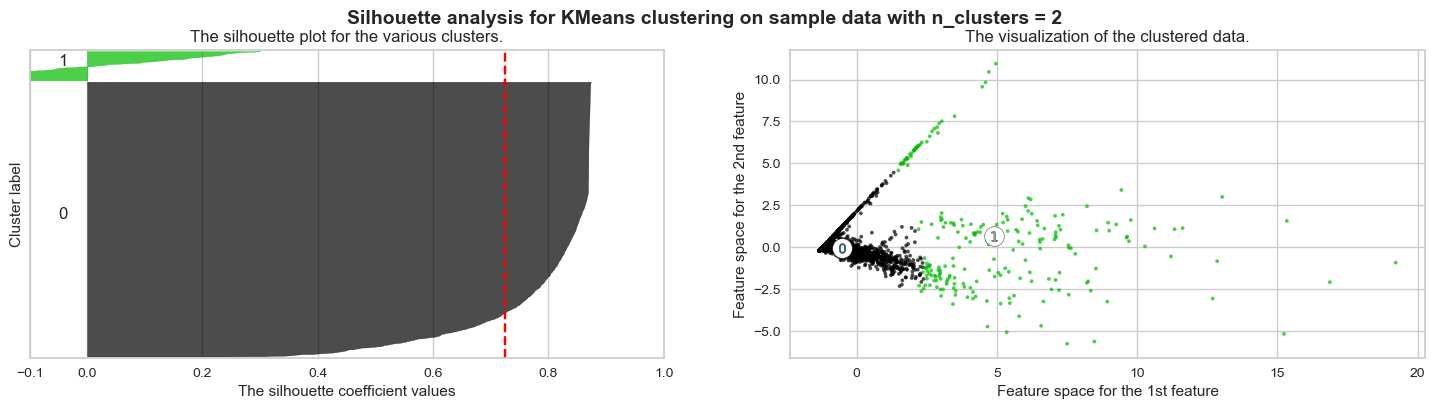

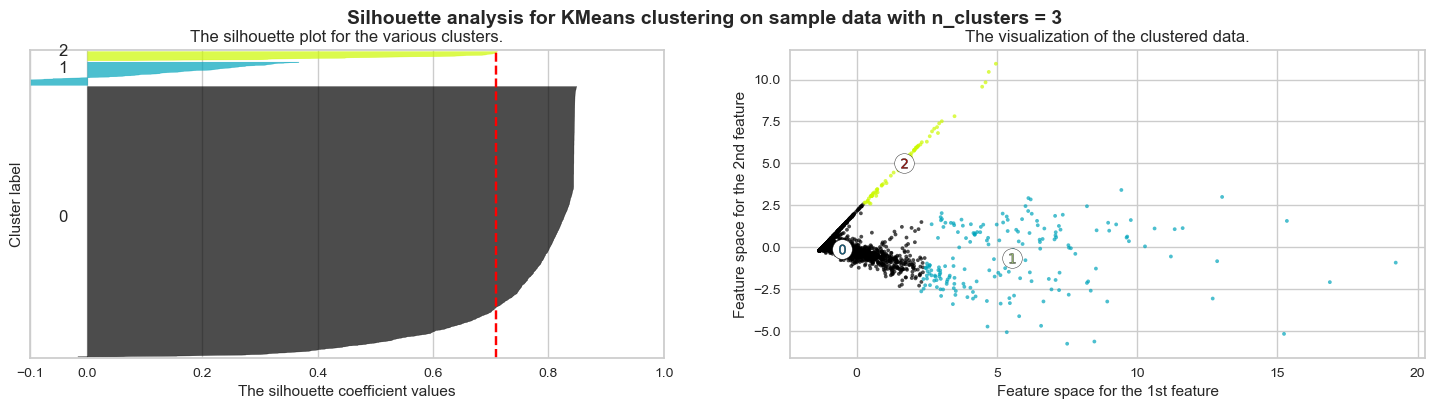

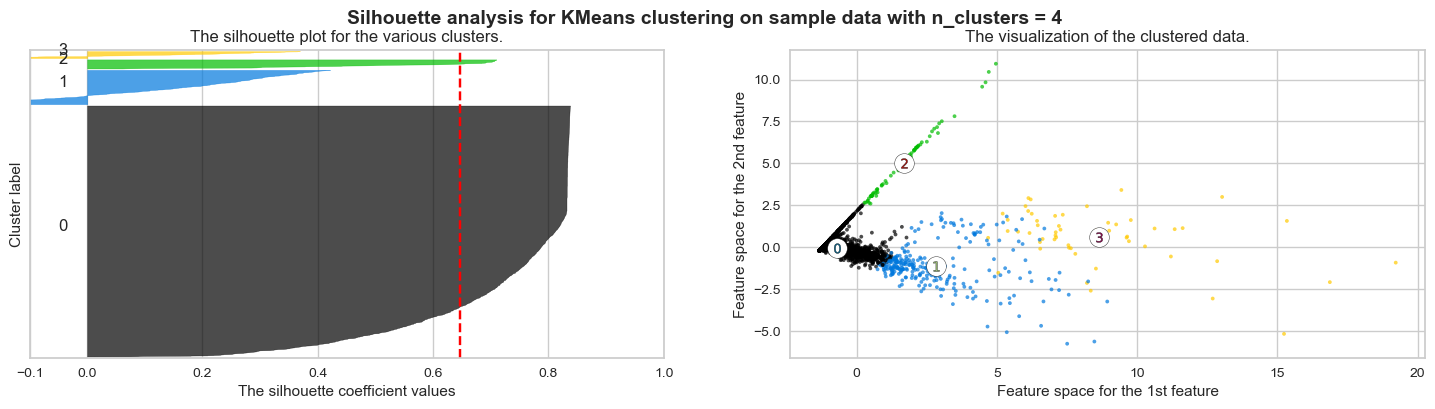

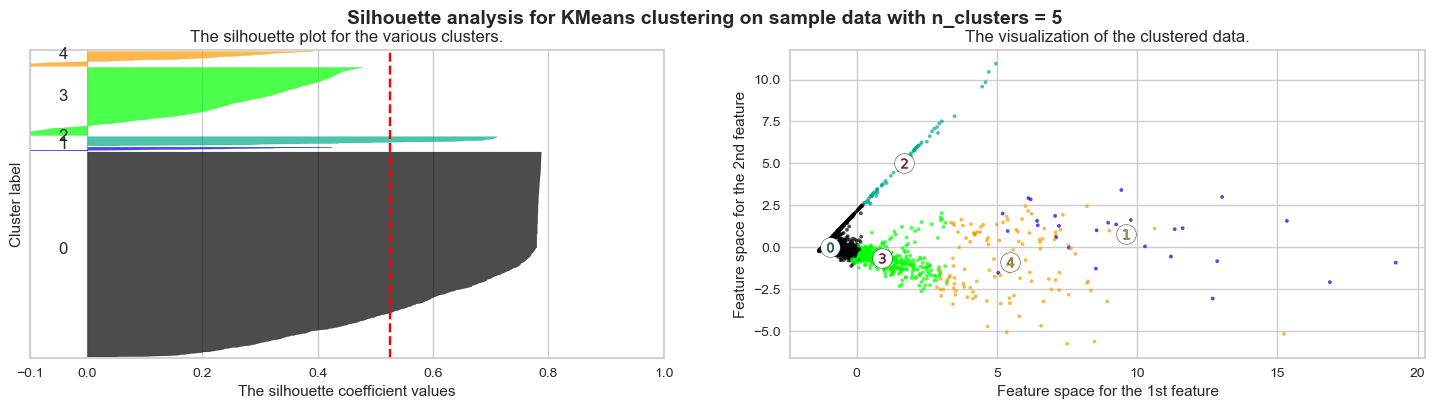

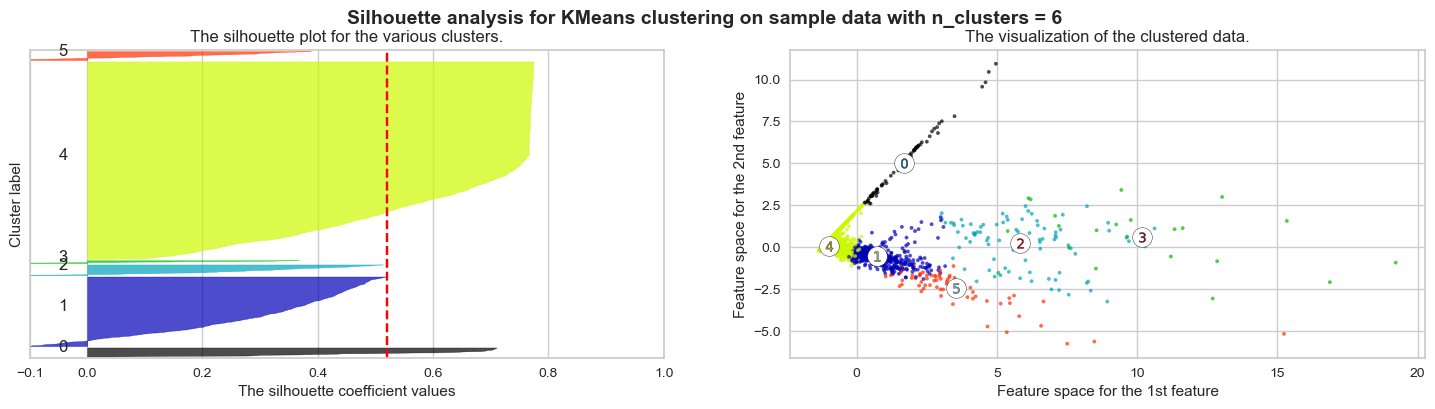

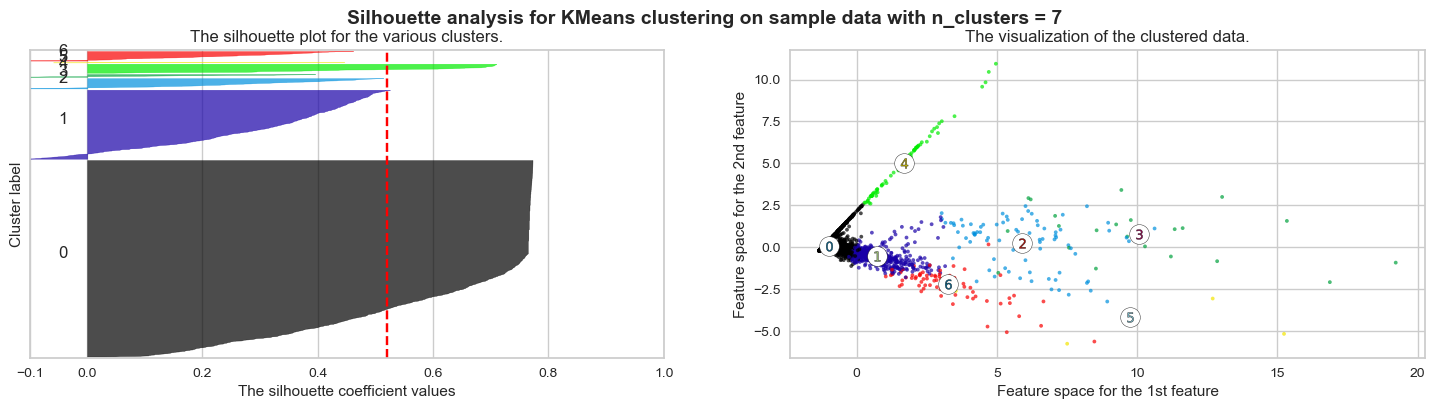

In [291]:
plot_silhouette(range(2, 8), sales_scaled_pca, random_state)

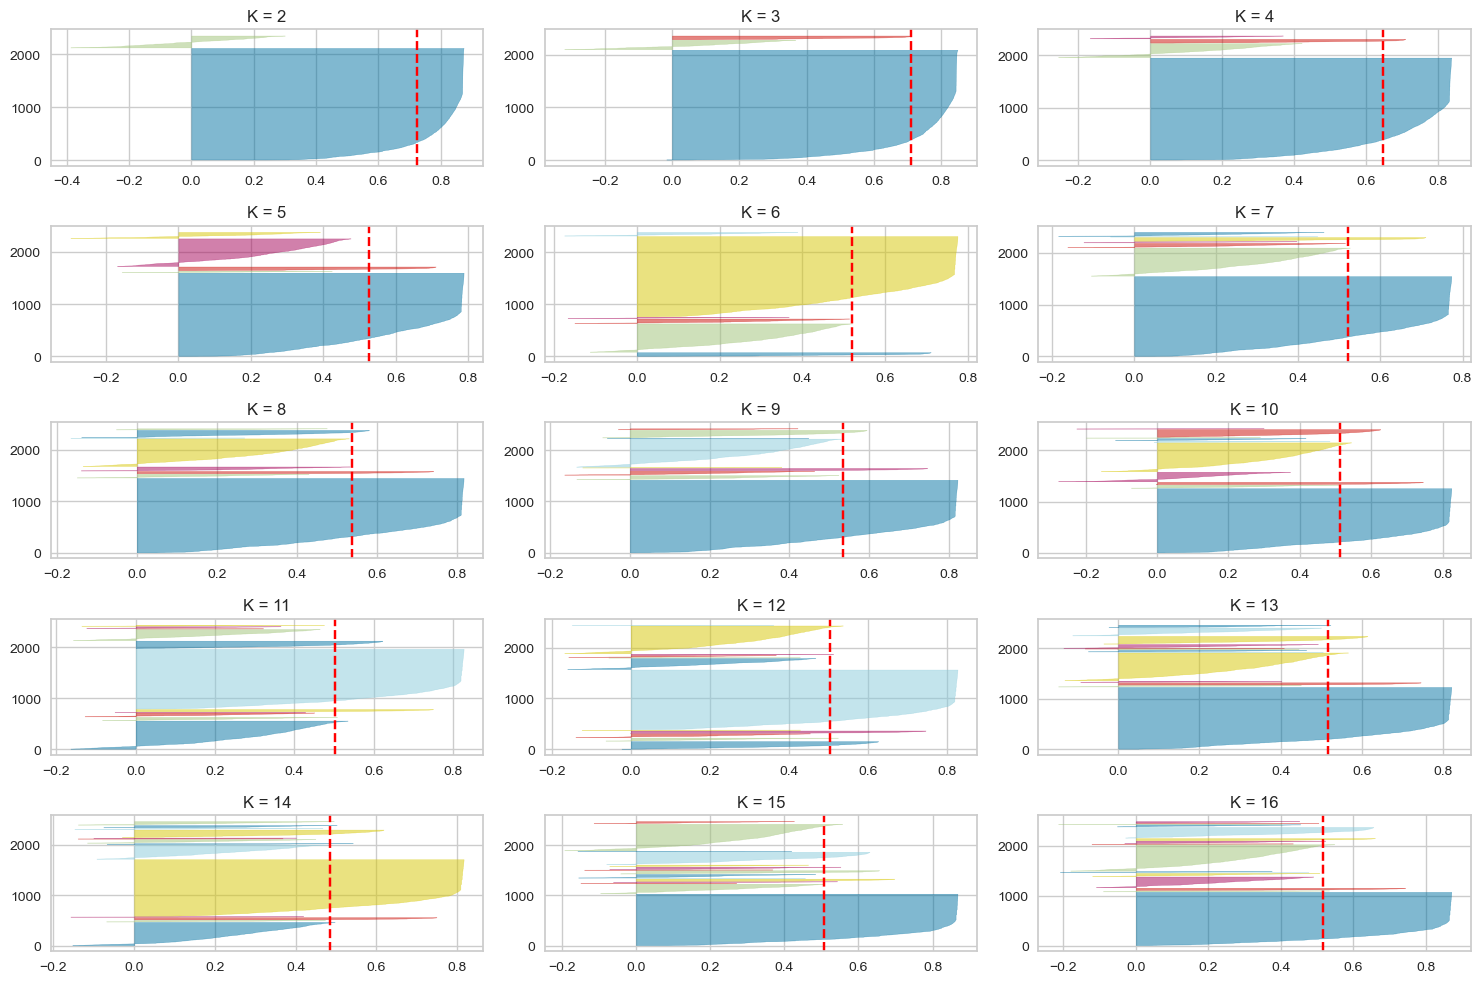

In [292]:
# Display the Silhouette Score and Plot Silhouette Plot
from yellowbrick.cluster import SilhouetteVisualizer

fig, axes = plt.subplots(5, 3, figsize=(15, 10))

# Loop for each plot
for i, ax in enumerate(axes.flatten()):

    # Initialize K-means clustering
    n_clusters = i + 2
    kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)

    # Create SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Fit visualizer to data
    visualizer.fit(sales_scaled_pca)

    # Set title
    ax.set_title(f'K = {n_clusters}')

# Adjust layout
plt.tight_layout()
plt.show()

In [296]:
# Train with optimal number of clusters

km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
pred = km.fit_predict(sales_scaled_pca)
pred

array([3, 2, 0, ..., 0, 0, 0])

In [297]:
# Insert clustering result into original dataset

df['cluster'] = pred
df

,fullname,first_name,last_name,username,gender,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
0,Albrecht Consadine,Albrecht,Consadine,aconsadinere,Male,1360,1358,597,978,278,98,5,0,1,3
1,Hayes Patriskson,Hayes,Patriskson,hpatrisksonkl,Male,2273,2,6,2273,0,0,0,0,0,2
2,Napoleon McVicar,Napoleon,McVicar,nmcvicar2v,Male,197,540,261,170,27,0,0,0,0,0
3,Simeon Kenan,Simeon,Kenan,skenan4f,Male,55,785,83,42,10,1,1,1,0,0
4,Laraine Frenzel;,Laraine,Frenzel;,lfrenzelmr,Female,216,679,191,160,52,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,Olenolin Badcock,Olenolin,Badcock,obadcockom,Male,758,24,3,758,0,0,0,0,0,0
2330,Letty Sitlington,Letty,Sitlington,lsitlingtonbi,Female,27,0,0,27,0,0,0,0,0,0
2331,Lucas Billsberry,Lucas,Billsberry,lbillsberry55,Male,0,0,0,0,0,0,0,0,0,0
2332,Mathias Slobom,Mathias,Slobom,mslobom1b,Male,0,0,0,0,0,0,0,0,0,0


<Axes: >

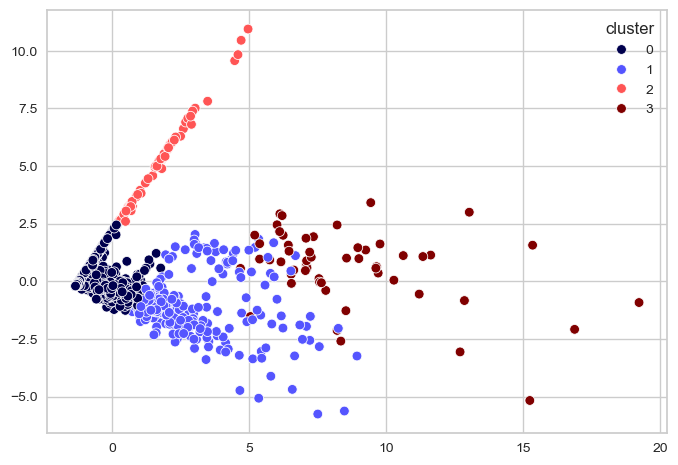

In [299]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=2)
pca_2d.fit(df_scaled)

sales_scaled_pca_2d = pca_2d.fit_transform(df_scaled)

sns.scatterplot(x=sales_scaled_pca_2d[:,0], y=sales_scaled_pca_2d[:,1], hue=df['cluster'],palette='seismic')